In [3]:
#Installation of the libraries required for the Netflix Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
# Load the dataset called netflix_data.csv
df = pd.read_csv("netflix_data.csv")

# As Instructed, Rename the DataFrame from df to Netflix_shows_movies
Netflix_shows_movies = df

# This code will display the first five rows of the dataset
Netflix_shows_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


# Data cleaning Process observed in this analysis
## Check for Missing values

In [5]:
# This code will show the total missing values in each column
Netflix_shows_movies.isnull().sum()

,0
show_id,0
type,0
title,0
director,1969
cast,570
country,476
date_added,11
release_year,0
rating,10
duration,0


In [6]:
#Drop the missing values in the dataset
Netflix_shows_movies.dropna(inplace=True)


In [7]:
#Confirm if the dataset is free from missung values
Netflix_shows_movies.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [8]:
Netflix_shows_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3774 entries, 0 to 6213
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       3774 non-null   int64 
 1   type          3774 non-null   object
 2   title         3774 non-null   object
 3   director      3774 non-null   object
 4   cast          3774 non-null   object
 5   country       3774 non-null   object
 6   date_added    3774 non-null   object
 7   release_year  3774 non-null   int64 
 8   rating        3774 non-null   object
 9   duration      3774 non-null   object
 10  listed_in     3774 non-null   object
 11  description   3774 non-null   object
dtypes: int64(2), object(10)
memory usage: 383.3+ KB


In [10]:
#check for duplicated values in the data set
Netflix_shows_movies.duplicated().sum()

np.int64(0)

# Data Exploration

In [9]:
#Total number of rows and columns
Netflix_shows_movies.shape

(3774, 12)

In [19]:
#Summary statistics for the numerical columns

Netflix_shows_movies.describe()


,show_id,release_year
count,3.774000e+03,3774.000000
mean,7.510908e+07,2012.087440
std,1.341114e+07,9.566944
min,2.477470e+05,1942.000000
25%,7.027581e+07,2011.000000
50%,8.014732e+07,2016.000000
75%,8.024067e+07,2017.000000
max,8.123573e+07,2020.000000


In [20]:
# Identify categorical columns
categorical_columns = Netflix_shows_movies.select_dtypes(include=['object']).columns

# Describe the categorical columns
Netflix_shows_movies[categorical_columns].describe()

,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,3774,3774,3774,3774,3774,3774,3774,3774,3774,3774
unique,2,3752,2920,3667,433,1014,14,184,296,3766
top,Movie,The Silence,"Raúl Campos, Jan Suter",Samuel West,United States,"January 1, 2020",TV-MA,90 min,"Dramas, International Movies",A surly septuagenarian gets another chance at ...
freq,3678,3,18,10,1323,105,1189,93,237,3


In [13]:
# Investigating the oldest movies in the Netflix dataset
oldest_movies = (
    Netflix_shows_movies[Netflix_shows_movies['duration'] != ""]
    .sort_values('release_year')
    [['title', 'release_year']]
    .head(10)
)


In [16]:
print(oldest_movies)

                        title  release_year
2013     The Battle of Midway          1942
2021         Tunisian Victory          1944
2005  Know Your Enemy - Japan          1945
2006       Let There Be Light          1946
2930             The Stranger          1946
2020              Thunderbolt          1947
2981          White Christmas          1954
1401    Rebel Without a Cause          1955
1369         Forbidden Planet          1956
1371                     Gigi          1958


In [21]:
# count of content types
Netflix_shows_movies['type'].value_counts()



,count
type,
Movie,3678
TV Show,96


In [22]:
# The Top 10 most frequent countries
Netflix_shows_movies['country'].value_counts().head(10)


,count
country,
United States,1323
India,707
United Kingdom,152
Canada,78
Spain,72
Turkey,60
Japan,54
Mexico,51
Hong Kong,48


In [23]:

# The most common ratings
Netflix_shows_movies['rating'].value_counts()

,count
rating,
TV-MA,1189
TV-14,917
R,501
TV-PG,358
PG-13,278
PG,176
NR,175
TV-G,54
TV-Y7,48


In [24]:
#Distribution of release years of movies
Netflix_shows_movies['release_year'].value_counts().sort_index()

,count
release_year,
1942,1
1944,1
1945,1
1946,2
1947,1
...,...
2016,514
2017,585
2018,537


In [25]:
# Split 'duration' into numeric values and units
Netflix_shows_movies[['duration_int', 'duration_type']] = Netflix_shows_movies['duration'].str.extract('(\d+)\s*(\w+)')
Netflix_shows_movies['duration_int'] = Netflix_shows_movies['duration_int'].astype(float)

In [28]:
#Verify if the split worked
Netflix_shows_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int,duration_type
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,90.0,min
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,99.0,min
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",110.0,min
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,60.0,min
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,90.0,min


In [29]:
#Identify the most common genres (Categories)
Netflix_shows_movies['listed_in'].value_counts().head(10)

,count
listed_in,
"Dramas, International Movies",237
Stand-Up Comedy,234
"Dramas, Independent Movies, International Movies",184
"Comedies, Dramas, International Movies",168
Documentaries,136
"Children & Family Movies, Comedies",118
"Comedies, International Movies",110
"Dramas, International Movies, Romantic Movies",103
"Action & Adventure, Dramas, International Movies",99


# Data Visualization

## Create visualizations to represent the following:
**1. Most watched genres.**

**2. Ratings distribution.**


<ipython-input-30-5c96bc3dcd0a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")


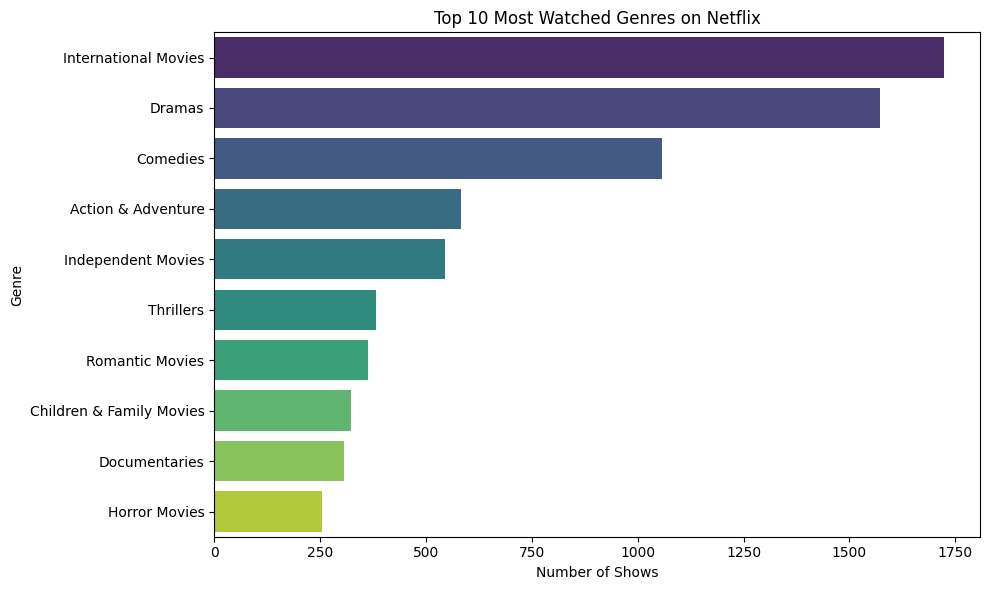

In [30]:
# Split the 'listed_in' column into separate genres
all_genres = Netflix_shows_movies['listed_in'].dropna().str.split(', ')
genre_counts = pd.Series([genre for sublist in all_genres for genre in sublist]).value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title('Top 10 Most Watched Genres on Netflix')
plt.xlabel('Number of Shows')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

<ipython-input-31-109a49c88b00>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Netflix_shows_movies, x='rating', order=Netflix_shows_movies['rating'].value_counts().index, palette="Set2")


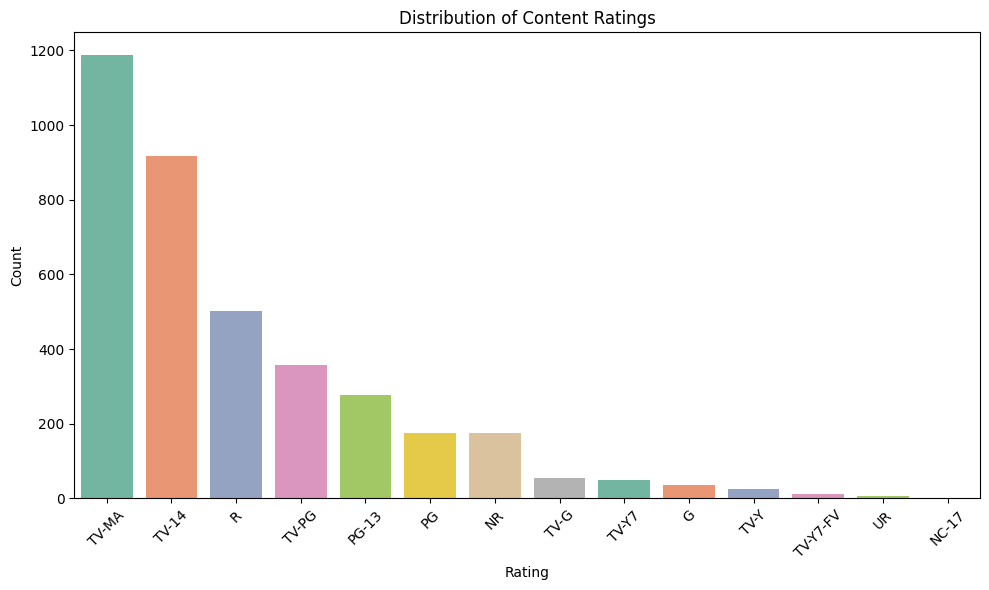

In [31]:
# Count plot of ratings
plt.figure(figsize=(10,6))
sns.countplot(data=Netflix_shows_movies, x='rating', order=Netflix_shows_movies['rating'].value_counts().index, palette="Set2")
plt.title('Distribution of Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
